In [1]:
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [41]:
import pandas as pd
import sklearn

In [42]:
data_path = "D:/Teaching/BSc. CSIT-2081-B/data/lr-Real-estate.csv"

In [43]:
import os

os.path.exists(data_path)

True

In [44]:
df = pd.read_csv(data_path)
df.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3


In [45]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [46]:
df = df.drop(['No', 'X1 transaction date'], axis=1)
df.head(2)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2


In [47]:
df.isna().sum()

X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [48]:
df.duplicated().sum()

0

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   X5 latitude                             414 non-null    float64
 4   X6 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [50]:
df.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [51]:
import matplotlib.pyplot as plt

In [52]:
df.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [53]:
house_age = df['X2 house age'].to_numpy()
house_age

array([32. , 19.5, 13.3, 13.3,  5. ,  7.1, 34.5, 20.3, 31.7, 17.9, 34.8,
        6.3, 13. , 20.4, 13.2, 35.7,  0. , 17.7, 16.9,  1.5,  4.5, 10.5,
       14.7, 10.1, 39.6, 29.3,  3.1, 10.4, 19.2,  7.1, 25.9, 29.6, 37.9,
       16.5, 15.4, 13.9, 14.7, 12. ,  3.1, 16.2, 13.6, 16.8, 36.1, 34.4,
        2.7, 36.6, 21.7, 35.9, 24.2, 29.4, 21.7, 31.3, 32.1, 13.3, 16.1,
       31.7, 33.6,  3.5, 30.3, 13.3, 11. ,  5.3, 17.2,  2.6, 17.5, 40.1,
        1. ,  8.5, 30.4, 12.5,  6.6, 35.5, 32.5, 13.8,  6.8, 12.3, 35.9,
       20.5, 38.2, 18. , 11.8, 30.8, 13.2, 25.3, 15.1,  0. ,  1.8, 16.9,
        8.9, 23. ,  0. ,  9.1, 20.6, 31.9, 40.9,  8. ,  6.4, 28.4, 16.4,
        6.4, 17.5, 12.7,  1.1,  0. , 32.7,  0. , 17.2, 12.2, 31.4,  4. ,
        8.1, 33.3,  9.9, 14.8, 30.6, 20.6, 30.9, 13.6, 25.3, 16.6, 13.3,
       13.6, 31.5,  0. ,  9.9,  1.1, 38.6,  3.8, 41.3, 38.5, 29.6,  4. ,
       26.6, 18. , 33.4, 18.9, 11.4, 13.6, 10. , 12.9, 16.2,  5.1, 19.8,
       13.6, 11.9,  2.1,  0. ,  3.2, 16.4, 34.9, 35

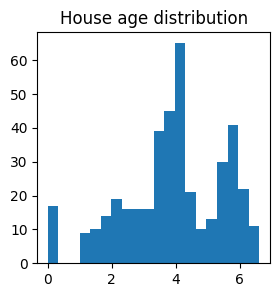

In [54]:
import numpy as np
# house_age = -1*house_age
plt.figure(figsize=(3, 3))
plt.hist(
    np.where(house_age>0, np.sqrt(house_age), house_age), 
    bins=20
)
plt.title('House age distribution')
plt.show()

In [55]:
df['X2 house age'].head()

0    32.0
1    19.5
2    13.3
3    13.3
4     5.0
Name: X2 house age, dtype: float64

In [56]:
df['X2 house age'] = df['X2 house age'].apply(np.sqrt)

In [57]:
df['X2 house age'].head()

0    5.656854
1    4.415880
2    3.646917
3    3.646917
4    2.236068
Name: X2 house age, dtype: float64

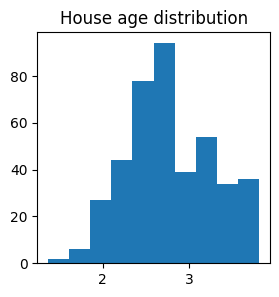

In [58]:
plt.figure(figsize=(3, 3))
plt.hist(
    df['X3 distance to the nearest MRT station'].apply(np.log10)
)
plt.title('House age distribution')
plt.show()

In [59]:
df['X3 distance to the nearest MRT station'] = (
    df['X3 distance to the nearest MRT station'].apply(np.log10)
)

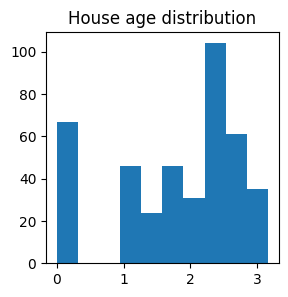

In [60]:
plt.figure(figsize=(3, 3))
plt.hist(
    df['X4 number of convenience stores'].apply(np.sqrt)
)
plt.title('House age distribution')
plt.show()

### Independent-Dependent Split

In [61]:
X = df.drop(['Y house price of unit area'], axis=1)
y = df['Y house price of unit area']

### Data Split
- Train split
- Test split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train.shape, y_train.shape

((331, 5), (331,))

In [65]:
X_test.shape, y_test.shape

((83, 5), (83,))

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lr_model = LinearRegression()

In [68]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [69]:
predictions = lr_model.predict(X_test)

In [70]:
predictions.shape

(83,)

In [71]:
d = {
    'GT': y_test,
    'predictions':predictions
}
comparison_df = pd.DataFrame(d)
comparison_df.head(15)

,GT,predictions
358,45.1,50.838509
350,42.3,39.138891
373,52.2,51.343501
399,37.3,47.009681
369,22.8,26.471696
72,36.3,40.322861
262,53.0,46.795052
140,51.4,46.720676
93,16.1,23.027449
70,59.0,56.436270


In [72]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, predictions)

7.003753676000623

In [73]:
X_train.shape

(331, 5)

In [74]:
np.random.random(5)

array([0.2683734 , 0.20328383, 0.73030806, 0.03714983, 0.12790087])

In [75]:
X_train.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,331.000000,331.000000,331.000000,331.000000,331.000000
mean,3.849507,2.773145,4.145015,24.969333,121.533885
std,1.574040,0.476760,2.953703,0.012484,0.014976
min,0.000000,1.368897,0.000000,24.932070,121.475160
25%,2.906876,2.461386,1.000000,24.963010,121.529665
50%,3.987480,2.692169,4.000000,24.971100,121.539170
75%,5.215353,3.159244,6.000000,24.978260,121.543480
max,6.618157,3.799765,10.000000,25.014590,121.566270


In [76]:
X_train.head(5)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
192,6.618157,1.760343,7,24.96750,121.54069
234,2.828427,3.345690,4,24.96007,121.51361
5,2.664583,3.337465,3,24.96305,121.51254
45,6.049793,2.689148,8,24.97015,121.54494
245,2.738613,2.805922,5,24.97258,121.54814


In [77]:
X_train.to_numpy()

array([[  6.61815684,   1.76034293,   7.        ,  24.9675    ,
        121.54069   ],
       [  2.82842712,   3.34568968,   4.        ,  24.96007   ,
        121.51361   ],
       [  2.66458252,   3.33746525,   3.        ,  24.96305   ,
        121.51254   ],
       ...,
       [  3.28633535,   2.40240274,   1.        ,  24.9746    ,
        121.53046   ],
       [  2.14476106,   2.41440622,   6.        ,  24.97585   ,
        121.54516   ],
       [  1.04880885,   2.28687058,   6.        ,  24.96571   ,
        121.54089   ]])

In [78]:
import numpy as np
import pandas as pd


class CustomLinearRegression:
    def __init__(self, alpha=0.001, n_iter=100, scale_features=True):
        self.alpha = alpha
        self.n_iter = n_iter
        self.scale_features = scale_features
        self.w = None
        self.b = np.random.random()

    def _feature_scaling(self, X):
        """Scale features to have zero mean and unit variance."""
        self.feature_means = np.mean(X, axis=0)
        self.feature_stds = np.std(X, axis=0)
        # Prevent division by zero for constant features
        self.feature_stds[self.feature_stds == 0] = 1.0
        return (X - self.feature_means) / self.feature_stds

    def train(self, X, y):
        """Train the linear regression model using gradient descent."""
        # Ensure input is numpy array
        if isinstance(X, (pd.DataFrame, pd.Series)):
            X = X.to_numpy()
        elif not isinstance(X, np.ndarray):
            raise ValueError("X must be a numpy array or pandas DataFrame")

        if isinstance(y, (pd.DataFrame, pd.Series)):
            y = y.to_numpy()
        elif not isinstance(y, np.ndarray):
            raise ValueError("y must be a numpy array or pandas DataFrame")

        # Feature scaling
        scaled = False
        if self.scale_features:
            X = self._feature_scaling(X)
            scaled = True

        self.n_rec, self.n_features = X.shape

        # Initialize weights
        self.w = np.random.random(self.n_features)  

        for i in range(self.n_iter):
            y_hat = self.predict(X, scaled=scaled)  
            diff = y - y_hat
            loss = self.loss_mse(y, y_hat)

            # Gradient calculation
            grad_w = -(2 / self.n_rec) * np.dot(X.T, diff)
            grad_b = -(2 / self.n_rec) * np.sum(diff)

            self.w = self.w - self.alpha * grad_w
            self.b = self.b - self.alpha * grad_b

            # if i % 10 == 0 or i == self.n_iter - 1:
            print(f"Epoch {i + 1}/{self.n_iter}: Loss = {loss:.6f}")

    def predict(self, X, scaled=False):
        """Predict values using the trained model."""
        if isinstance(X, (pd.DataFrame, pd.Series)):
            X = X.to_numpy()
        elif not isinstance(X, np.ndarray):
            raise ValueError("X must be a numpy array or pandas DataFrame")

        # Scale features if scaling is enabled
        if self.scale_features and not scaled:
            X = (X - self.feature_means) / self.feature_stds

        return np.dot(X, self.w) + self.b

    def loss_mse(self, y, y_hat):
        """Calculate Mean Squared Error."""
        return np.mean((y - y_hat) ** 2)


reg_model = CustomLinearRegression(alpha=0.02, n_iter=100)
reg_model.train(X_train, y_train)
preds = reg_model.predict(X_test)
root_mean_squared_error(y_test, preds)

Epoch 1/100: Loss = 1632.444520
Epoch 2/100: Loss = 1501.868422
Epoch 3/100: Loss = 1383.179711
Epoch 4/100: Loss = 1275.125306
Epoch 5/100: Loss = 1176.612503
Epoch 6/100: Loss = 1086.684386
Epoch 7/100: Loss = 1004.499492
Epoch 8/100: Loss = 929.314938
Epoch 9/100: Loss = 860.472393
Epoch 10/100: Loss = 797.386354
Epoch 11/100: Loss = 739.534336
Epoch 12/100: Loss = 686.448624
Epoch 13/100: Loss = 637.709306
Epoch 14/100: Loss = 592.938369
Epoch 15/100: Loss = 551.794682
Epoch 16/100: Loss = 513.969699
Epoch 17/100: Loss = 479.183778
Epoch 18/100: Loss = 447.182995
Epoch 19/100: Loss = 417.736402
Epoch 20/100: Loss = 390.633626
Epoch 21/100: Loss = 365.682779
Epoch 22/100: Loss = 342.708621
Epoch 23/100: Loss = 321.550948
Epoch 24/100: Loss = 302.063158
Epoch 25/100: Loss = 284.110982
Epoch 26/100: Loss = 267.571357
Epoch 27/100: Loss = 252.331412
Epoch 28/100: Loss = 238.287565
Epoch 29/100: Loss = 225.344708
Epoch 30/100: Loss = 213.415474
Epoch 31/100: Loss = 202.419575
Epoch 32/1

6.784554804707664